In [1]:
from google.colab import drive
import os

drive.mount('/content/drive/')
os.getcwd()

path = '/content/drive/My Drive/greatlearning/pundit_session/'
os.chdir(path)
os.listdir(path)

Mounted at /content/drive/


['test.csv',
 'train.csv',
 'analysis-of-banking-data.ipynb',
 'analysis-of-banking-data_rf.ipynb']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set some display options:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 36)

In [3]:
# load datas
train = pd.read_csv('train.csv',sep=';')
test = pd.read_csv('test.csv',sep=';')

In [4]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
# print train and test data shape
print('train set size is : ', train.shape)
print('test set size is : ', test.shape)

train set size is :  (45211, 17)
test set size is :  (4521, 17)


In [7]:
# lets see the features of train set
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
# lets check infos of train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

so **NaN** values

In [10]:
# subscribed feature is our target variabe wwe will convert it to numeric 

train['y'].replace('no', 0 , inplace=True)
train['y'].replace('yes', 1, inplace=True)
test['y'].replace('no', 0 , inplace=True)
test['y'].replace('yes', 1, inplace=True)

## Numerical and Categorical features
I will separate the data into Numerical and Categorical features.

### Numerical features

In [11]:
# numerical features
numerical_features = [cols for cols in train.columns if train[cols].dtype != 'O']
numerical_features = train[numerical_features]
numerical_features.head()

,age,balance,day,duration,campaign,pdays,previous,y
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0


In [12]:
numerical_features.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [13]:
# correlation between independent features and dependent features
corr = train.corr()
corr

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


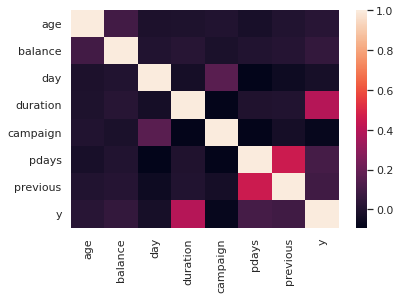

In [14]:
# correlation in heatmap
sns.heatmap(corr)

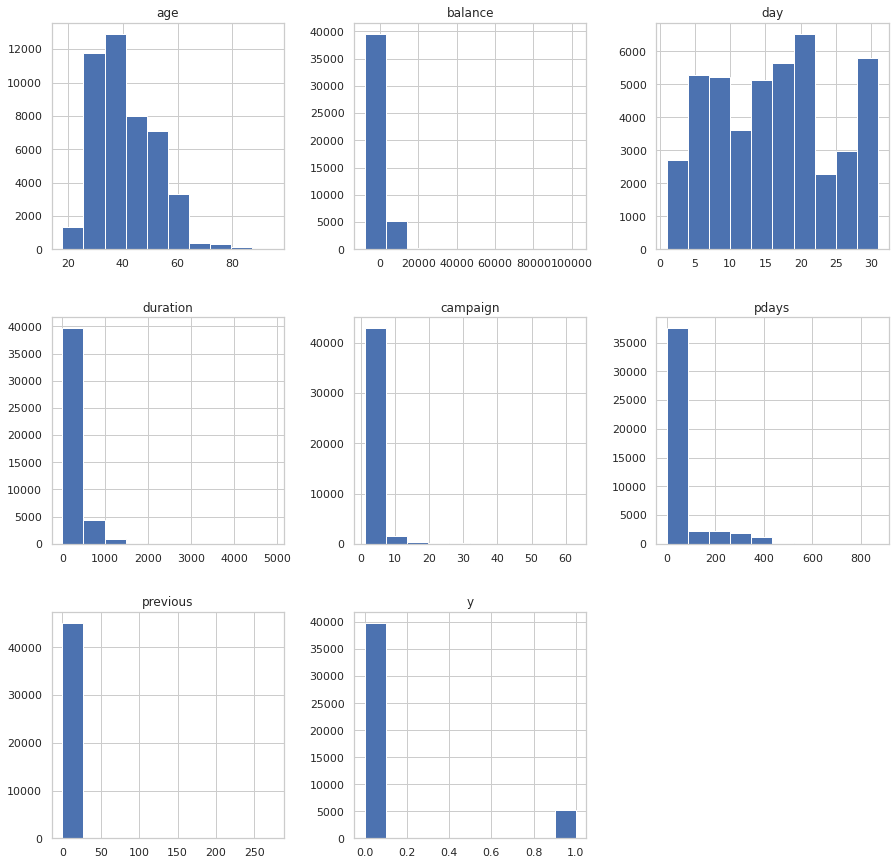

In [15]:
numerical_features.hist(figsize = (15,15))
plt.show()

### Categorical features

In [16]:
# categorical features
categorical_features = [cols for cols in train.columns if train[cols].dtype == 'O']
categorical_features = train[categorical_features]
categorical_features.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


In [17]:
print('Lets see the unique values in Categorical_features:')
print('#########################################################\n')

for feature in categorical_features:
    print('The unique values in '+ feature + " " + 'feature are:' )
    print(train[feature].unique())
    print('\n')

Lets see the unique values in Categorical_features:
#########################################################

The unique values in job feature are:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


The unique values in marital feature are:
['married' 'single' 'divorced']


The unique values in education feature are:
['tertiary' 'secondary' 'unknown' 'primary']


The unique values in default feature are:
['no' 'yes']


The unique values in housing feature are:
['yes' 'no']


The unique values in loan feature are:
['no' 'yes']


The unique values in contact feature are:
['unknown' 'cellular' 'telephone']


The unique values in month feature are:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


The unique values in poutcome feature are:
['unknown' 'failure' 'other' 'success']




#### Univariate analysis of categorical features

The figures or grapbs are self-explanatory so i will not be describing the graphs.

In [18]:
# Checking the target features
train.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


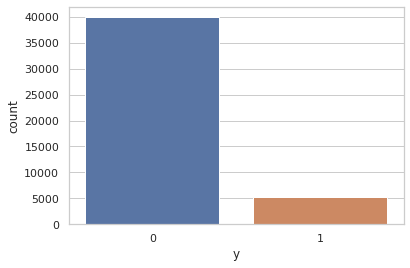

In [19]:
sns.countplot(train.y)
plt.show()

above plot clearly shows the issues of **Class Imbalance.**

There are few ways to deal with such issues we will look at them later.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


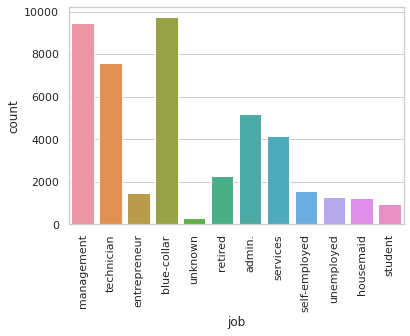

In [20]:
# Distribution of job feature
sns.countplot(train.job)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


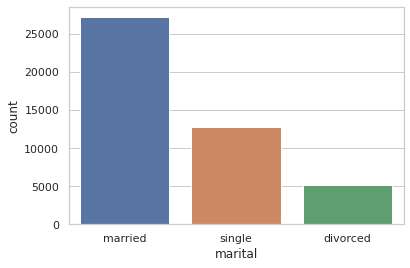

In [21]:
# Distribution of marital features
sns.countplot(train.marital)
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


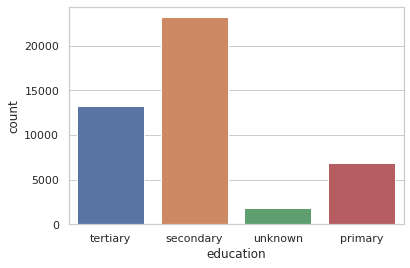

In [22]:
# Distribution of marital feature
sns.countplot(train.education)
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


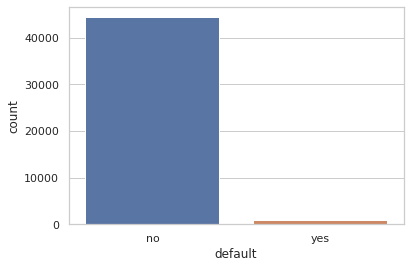

In [23]:
# Distribution of default feature
sns.countplot(train.default)
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


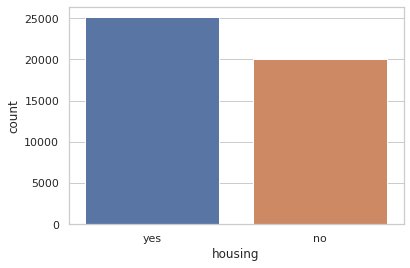

In [24]:
# Distribution of housing features
sns.countplot(train.housing)
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


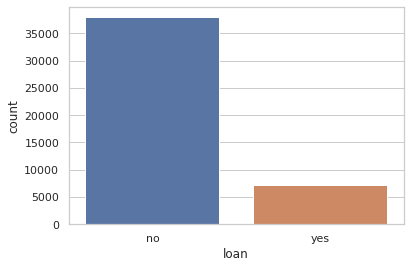

In [25]:
# Distribution of loan features
sns.countplot(train.loan)
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


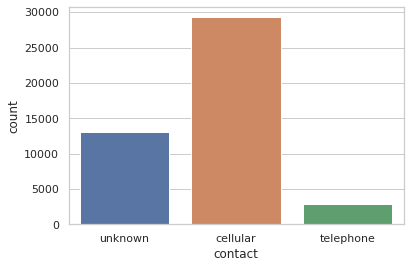

In [26]:
# Distribution of contact feature
sns.countplot(train.contact)
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


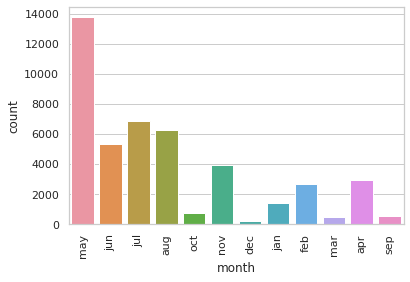

In [27]:
# Distribution of month feature
sns.countplot(train.month)
plt.xticks(rotation=90)
plt.show()

**Bivariate analysis of Categorical features with target features**.

the figures are self explanatory so i will not be describing them

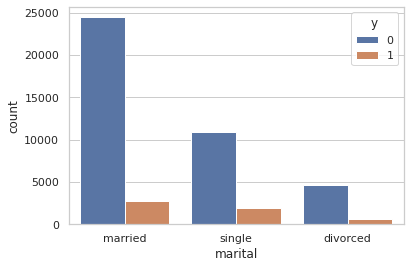

In [28]:
sns.countplot(x="marital", hue="y", data=train)

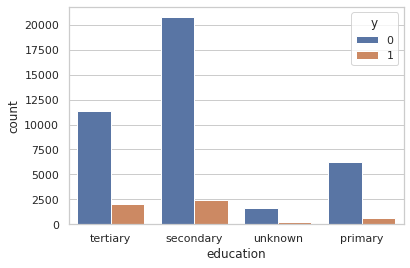

In [29]:
sns.countplot(x="education", hue="y", data=train)
plt.xticks(rotation=0)
plt.show()

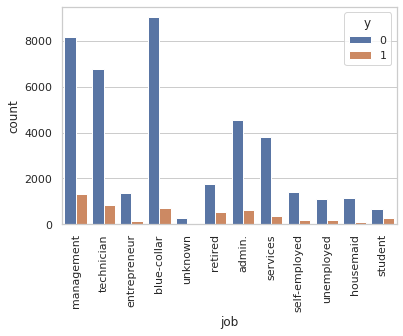

In [30]:
sns.countplot(x="job", hue="y", data=train)
plt.xticks(rotation=90)
plt.show()

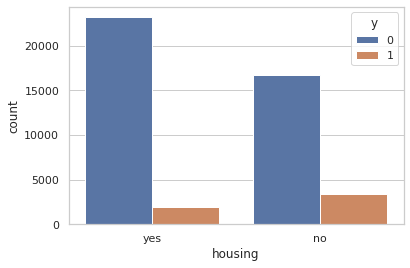

In [31]:
sns.countplot(x="housing", hue="y", data=train)
plt.xticks(rotation=0)
plt.show()

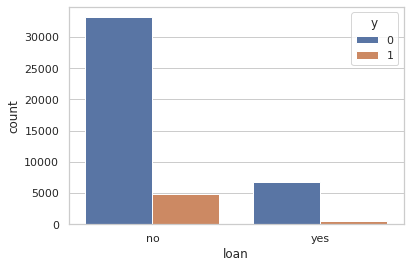

In [32]:
sns.countplot(x="loan", hue="y", data=train)
plt.xticks(rotation=0)
plt.show()

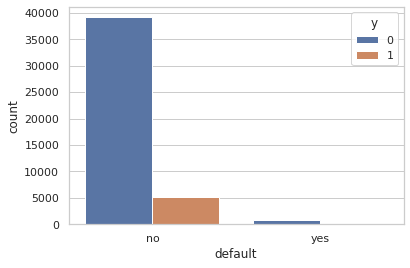

In [33]:
sns.countplot(x="default", hue="y", data=train)
plt.xticks(rotation=0)
plt.show()

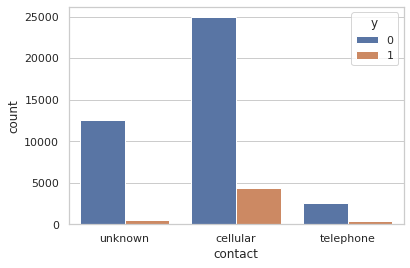

In [34]:
sns.countplot(x="contact", hue="y", data=train)
plt.xticks(rotation=0)
plt.show()

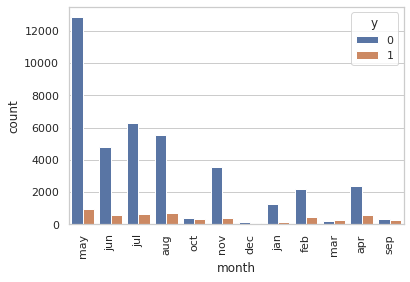

In [35]:
sns.countplot(x="month", hue="y", data=train)
plt.xticks(rotation=90)
plt.show()

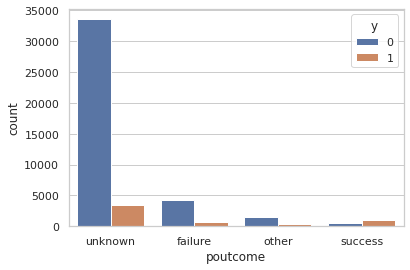

In [36]:
sns.countplot(x="poutcome", hue="y", data=train)
plt.xticks(rotation=0)
plt.show()

### Combining train set and test set
WE wil combine the train and test set together and do necessary things like one **hot encoding, feature scaling** etc. The reason for combining train and test data is so that we dont need to repeat above task like one hot encoding etc for test data again.

In [49]:
# combine train adn test data together
data = pd.concat([train,test], ignore_index=True)

In [50]:
train.shape, test.shape, data.shape

((45211, 17), (4521, 17), (49732, 17))

In [51]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [52]:
# checking null values
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

we can see null values in subscribed feature. If you see carefully the number of null values is exactly equal to test data. This null values is because target variable is missing in test data.

In [53]:
# lets separate newly combined data into numerical and categorical features

numerical_features = [cols for cols in data.columns if data[cols].dtype != 'O']
categorical_features = [cols for cols in data.columns if data[cols].dtype == 'O']

In [54]:
data[numerical_features].head()

,age,balance,day,duration,campaign,pdays,previous,y
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0


In [55]:
data[categorical_features].head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


In [56]:
# get dummies of categorical variable. Its same as one hot encoding.
# we do this one hot encoding of categorical variables because our ML algorithms only works with numeric

cat_dummies = pd.get_dummies(data[categorical_features])
cat_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,...,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [69]:
# concat numerical features and one hot encoded features fromm above

newdata = pd.concat([data[numerical_features], cat_dummies], axis = 1)
newdata.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [70]:
newdata.shape

(49732, 52)

## Feature scaling

In [71]:
# create feature and target vectors

features = newdata.drop('y', axis = 1)
target = newdata.y


In [60]:
features.describe()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,...,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892,0.113589,0.214711,0.033278,0.027186,0.209664,0.050149,0.035430,0.091913,0.020550,0.168202,0.028774,...,0.064486,0.288426,0.064848,0.138342,0.004705,0.057729,0.031187,0.152839,0.118073,0.010577,0.304914,0.087650,0.016448,0.012688,0.108401,0.040960,0.032977,0.817663
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838,0.317314,0.410626,0.179364,0.162626,0.407073,0.218254,0.184866,0.288906,0.141874,0.374049,0.167173,...,0.245619,0.453035,0.246259,0.345262,0.068434,0.233233,0.173825,0.359836,0.322698,0.102299,0.460376,0.282788,0.127193,0.111925,0.310889,0.198199,0.178578,0.386126
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
features.shape, target.shape

((49732, 51), (49732,))

In [73]:
cols = features.columns # columns of features 

In [74]:
# scaling is done here
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [75]:
# After scaling features above it is changed into ndarray. so we will change it back to Dataframe
features = pd.DataFrame(features, columns = [cols])
print(features.shape)
features.head()

(49732, 51)


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [76]:
features.describe()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,...,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,0.298149,0.085221,0.493877,0.052601,0.028493,0.047200,0.002098,0.113589,0.214711,0.033278,0.027186,0.209664,0.050149,0.035430,0.091913,0.020550,0.168202,0.028774,...,0.064486,0.288426,0.064848,0.138342,0.004705,0.057729,0.031187,0.152839,0.118073,0.010577,0.304914,0.087650,0.016448,0.012688,0.108401,0.040960,0.032977,0.817663
std,0.137857,0.027614,0.277189,0.052408,0.049985,0.114825,0.008199,0.317314,0.410626,0.179364,0.162626,0.407073,0.218254,0.184866,0.288906,0.141874,0.374049,0.167173,...,0.245619,0.453035,0.246259,0.345262,0.068434,0.233233,0.173825,0.359836,0.322698,0.102299,0.460376,0.282788,0.127193,0.111925,0.310889,0.198199,0.178578,0.386126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.073457,0.233333,0.020943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.272727,0.076871,0.500000,0.036600,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.389610,0.085795,0.666667,0.065067,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
# lets add subscribed to our features 
features['y'] = target

In [78]:
features.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


**Now i will separate the train and test data which we we cobined above.**

In [79]:
# separate traina dnd test data

train2 = features.iloc[:31647]
test2 = features.iloc[31647:]
train2.shape, test2.shape

((31647, 52), (18085, 52))

In [80]:
# drop target feature from test data
test2.drop('y', axis = 1, inplace = True)
print(test2.shape)

(18085, 51)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [81]:
train2.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


## Model building and Evaluation
I will build classification models for our data and perform evaluation

In [82]:
# import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Define feature and target vectors

In [83]:
# Define feature and target vectors
x = train2.iloc[:,:-1]
y = train2.iloc[:,-1]
x.shape, y.shape

((31647, 51), (31647,))

In [84]:
# split data into train and test set

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

### 1. Logistic Regression

In [95]:
# model creation
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [96]:
# predict result for x_test

y_pred = logreg.predict(x_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, ..., 0, 0, 0])

In [97]:
# check model accuracy

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9492


In [98]:
# check training set accuracy

y_pred_train = logreg.predict(x_train)
y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9463


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [99]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(x_test, y_test)))

Training set score: 0.9463
Test set score: 0.9492


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [100]:
# predicting target class for unseen test data.
# this data is test.csv given by kaggle

y_pred_test2 = logreg.predict(test2)
y_pred_test2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, ..., 0, 0, 0])

In [101]:
df_y_pred_test2 = pd.DataFrame(y_pred_test2, columns = ['test2pred'])
df_y_pred_test2.head()

,test2pred
0,0
1,0
2,0
3,0
4,1


In [102]:
df_y_pred_test2['test2pred'].unique()

array([0, 1])

In [103]:
df_y_pred_test2['test2pred'].value_counts()

0    17240
1      845
Name: test2pred, dtype: int64

In [104]:
# confusion matrix and classification report

cm = confusion_matrix(y_test,y_pred)
print('confusion matrix: \n ', cm)
print('\n')
print('classification report: \n ', classification_report(y_test,y_pred))

confusion matrix: 
  [[8880   83]
 [ 399  133]]


classification report: 
                precision    recall  f1-score   support

           0       0.96      0.99      0.97      8963
           1       0.62      0.25      0.36       532

    accuracy                           0.95      9495
   macro avg       0.79      0.62      0.66      9495
weighted avg       0.94      0.95      0.94      9495



Holyshit!!! Our accuracy is **0.90** but look at the recall value of minority calss 1, it just only **0.32**.

All the best accuracy score that we got above turns out to be **LIES**. You can also see the prediction in unseen test data **test2**(given by kaggle) gives much priority to majority class **0** 

Why so? These all is due to **class imbalance** 

### Over-sampling of minority class observation

It means we will randomly replicate minority class observation until it becomes actionablely proportional to majority class observation.

In [ ]:
y.value_counts()

In [ ]:
from sklearn.utils import resample

# separate the maority and minority class observation
data_major = train2[y == 0.0]
data_minor = train2[y == 1.0]

# over-sample the minority class observations
data_minor_oversample = resample(data_minor, replace = True, n_samples=27932, random_state = 0)

# finally combine the majority class observation and oversampled minoiry class observation
data_oversampled = pd.concat([data_major, data_minor_oversample])

In [ ]:
# class label count after oversampled.we will see that minoity class now is proportionate to majority class
data_oversampled.iloc[:,-1].value_counts()

In [ ]:
# again lets splt our over samoled data into feature and traget variables
X = data_oversampled.iloc[:,:-1]
Y = data_oversampled.iloc[:,-1]

# lets split data into train and test set
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

# model building
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

# Lets evaluate our model
y_pred_train = logreg.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

print("Accuracy score: ", accuracy_score(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

here our accuracy comes out be **0.83** which is less than previous accuracy score but this model have one good thing and thats recall value of minority class 1 which is **0.81** more improved than previous model whose recall value was **0.32**.

This model shows a slight case of **overfitting** but the train and test set accuracies are almost comparable. Even than if we want to reduce this overfitting we can **tune hyperparameter** which i will not be doing here

### I have stopped my notebook here but we can still test our data on other classification algorithms. There are many more techniques with wich we can improve our model performance.